# Information Gain

The expression for the information content of an event, defined as 

$$
I(x) = -\log_b(P(x)),
$$

is derived from the concept of surprise and how we quantify information. Here’s a step-by-step explanation of the derivation and rationale behind this formula:

### 1. Concept of Information and Surprise

- **Information Content**: When we observe an event \( x \) that occurs with a certain probability \( P(x) \), we want to measure how much information we gain from this observation.
- **Surprise**: The idea is that the less likely an event is (i.e., the smaller its probability), the more surprising and informative it is when it occurs. Conversely, highly probable events provide less surprise when they occur.

### 2. Logarithmic Scale for Measuring Information

- To quantify the amount of surprise, we can use a logarithmic function, which has the properties we desire:
  - **Decreasing returns**: As probability increases, the increase in information content decreases, reflecting the idea that highly likely events are less informative.
  - **Additivity**: For independent events, the total information gained is the sum of the individual information values. This is because of the property of logarithms: 
    $$
    \log_b(xy) = \log_b(x) + \log_b(y).
    $$

### 3. Formulating the Information Content

- We define the information content of an event \( x \) as inversely proportional to its probability. This is because we want the information to be higher for less likely events:
$$
I(x) \propto \frac{1}{P(x)}.
$$
  
- To make this relationship more manageable, we can take the logarithm of the probability. Logarithmic functions naturally produce a decreasing output as their input increases. Therefore, we take the negative logarithm:
$$
I(x) = -\log_b(P(x)).
$$

### 4. Understanding the Logarithm

- The choice of logarithm base \( b \) determines the unit of information:
  - **Base 2**: Information is measured in bits.
  - **Base \( e \)**: Information is measured in nats.
  - **Base 10**: Information is measured in dits or hartleys.

### 5. Properties of Information Content

- **Interpretation**:
  - If \( P(x) = 1 \) (certainty), then \( I(x) = -\log_b(1) = 0\). No information is gained because the event is certain.
  - If \( P(x) \) approaches 0 (very unlikely event), \( I(x) \) approaches infinity, indicating that observing this event would yield an infinite amount of information.

### Summary

The formula 

$$
I(x) = -\log_b(P(x))
$$ 

captures the notion that less probable events provide more information when they occur. By utilizing the properties of logarithms, we establish a meaningful and intuitive measure of information content that aligns with our understanding of surprise and uncertainty in probability theory. This foundational idea is critical in fields like information theory, communication, and data science.


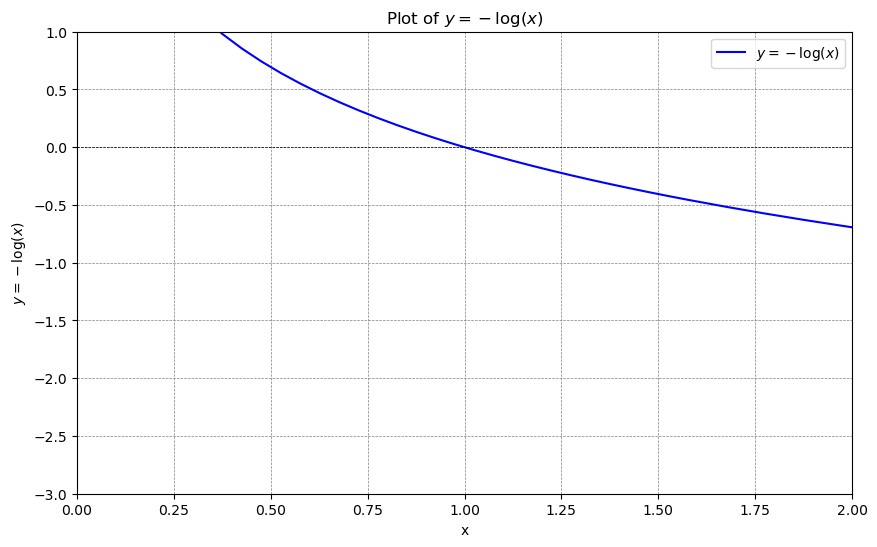

In [13]:
import torch
import matplotlib.pyplot as plt

# Define the x values
x = torch.linspace(-20, 20, 800)  # Avoid x=0 to prevent log(0)

# Calculate y values for -log(x)
y = -torch.log(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), y.numpy(), label=r'$y = -\log(x)$', color='blue')
plt.title(r'Plot of $y = -\log(x)$')
plt.xlabel('x')
plt.ylabel(r'$y = -\log(x)$')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xlim(0, 2)
plt.ylim(-3, 1)
plt.show()


# Entropy of a Probability Distribution

Entropy is a measure of uncertainty or randomness associated with a probability distribution. In the context of a probability density function (PDF) for a continuous random variable, the entropy quantifies the expected amount of information produced by the variable.

## Entropy for Discrete Random Variables

For a discrete random variable with probability mass function (PMF) \(P(X)\), the entropy \(H(X)\) is defined as:

$$
H(X) = -\sum_{i} P(x_i) \log_b \left( P(x_i) \right)
$$

Where:
- \(P(x_i)\) is the probability of each outcome \(x_i\).
- The logarithm can be taken in any base \(b\), commonly base 2 (for bits) or base \(e\) (for nats).

## Entropy for Continuous Random Variables

For a continuous random variable with a probability density function \(f(x)\), the entropy \(H(X)\) is defined as:

$$
H(X) = -\int_{-\infty}^{\infty} f(x) \log_b \left( f(x) \right) \, dx
$$

Where:
- \(f(x)\) is the PDF of the random variable \(X\).
- The integral is taken over the entire range of possible values of \(X\).

## Key Points about Entropy

- **Interpretation**: Higher entropy indicates more uncertainty or unpredictability, while lower entropy indicates more predictability.
- **Unit**: The unit of entropy depends on the base of the logarithm used. Base 2 gives the result in bits, while base \(e\) gives it in nats.
- **Properties**: Entropy is non-negative and is maximized for a uniform distribution.

Entropy is widely used in fields like information theory, statistics, and machine learning to evaluate the amount of uncertainty or the effectiveness of a model.


# Why is the Normal Distribution the Maximum-Entropy Distribution?

The normal distribution maximizes entropy when the **mean** and **variance** are the only constraints. Below is the step-by-step derivation of this result.

---

## 1. Differential Entropy Formula

The **differential entropy** \(H(f)\) of a continuous probability distribution with PDF \(f(x)\) is defined as:

$$
H(f) = -\int_{-\infty}^{\infty} f(x) \log(f(x)) \, dx
$$

Our goal is to **maximize the entropy** under the following constraints:

1. **Normalization Constraint**:
   $$
   \int_{-\infty}^{\infty} f(x) \, dx = 1
   $$

2. **Mean Constraint**:
   $$
   \int_{-\infty}^{\infty} x f(x) \, dx = \mu
   $$

3. **Variance Constraint**:
   $$
   \int_{-\infty}^{\infty} (x - \mu)^2 f(x) \, dx = \sigma^2
   $$

---

## 2. Setting up the Lagrange Function

We use the **method of Lagrange multipliers** to solve the optimization problem. We introduce multipliers \( \lambda_0 \), \( \lambda_1 \), and \( \lambda_2 \) for the constraints (normalization, mean, and variance).

The Lagrange function is:

$$
\mathcal{L}(f, \lambda_0, \lambda_1, \lambda_2) = -\int_{-\infty}^{\infty} f(x) \log(f(x)) \, dx 
+ \lambda_0 \left( \int_{-\infty}^{\infty} f(x) \, dx - 1 \right) 
$$

$$
+ \lambda_1 \left( \int_{-\infty}^{\infty} x f(x) \, dx - \mu \right) 
+ \lambda_2 \left( \int_{-\infty}^{\infty} (x - \mu)^2 f(x) \, dx - \sigma^2 \right)
$$

---

## 3. Taking the Functional Derivative

To find the distribution \( f(x) \) that maximizes the entropy, we take the **functional derivative** of \( \mathcal{L} \) with respect to \( f(x) \) and set it to zero:

$$
\frac{\delta \mathcal{L}}{\delta f(x)} = -\log(f(x)) - 1 + \lambda_0 + \lambda_1 x + \lambda_2 (x - \mu)^2 = 0
$$

Simplify:

$$
\log(f(x)) = \lambda_0 + \lambda_1 x + \lambda_2 (x - \mu)^2 - 1
$$

Taking the **exponential** of both sides:

$$
f(x) = \exp\left( \lambda_0 + \lambda_1 x + \lambda_2 (x - \mu)^2 - 1 \right)
$$

Rearranging:

$$
f(x) = C \, \exp\left( \lambda_1 x + \lambda_2 (x - \mu)^2 \right)
$$

where \( C = \exp(\lambda_0 - 1) \) is a normalization constant.

---

## 4. Identifying the Form of the Solution

The term \( \exp\left( \lambda_1 x + \lambda_2 (x - \mu)^2 \right) \) resembles the **Gaussian distribution**. We can rewrite it in the standard Gaussian form by completing the square.

Completing the square:

$$
\lambda_2 (x - \mu)^2 + \lambda_1 x = \lambda_2 \left( (x - \mu')^2 - \text{constant} \right)
$$

Thus:

$$
f(x) = C \, \exp\left( -\frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

where \( \mu \) is the mean and \( \sigma^2 = -\frac{1}{2 \lambda_2} \) is the variance.

---

## 5. Normalization and Final Form

The normalization constant \( C \) ensures the distribution integrates to 1:

$$
C = \frac{1}{\sqrt{2 \pi \sigma^2}}
$$

Thus, the maximum-entropy distribution is:

$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

This is the **PDF of the Gaussian (normal) distribution**.

---

## 6. Conclusion

The **normal distribution maximizes entropy** given only the constraints of mean and variance. This result shows that if we know only the mean and variance of a continuous random variable, the **normal distribution** makes the fewest assumptions, representing the most "uncertain" or "random" distribution possible under these constraints.

This statement highlights an important principle from **information theory** and **statistics**: 

- The **normal (Gaussian) distribution** is the most "uninformative" or "random" distribution when **mean** and **variance** are the only known constraints about the data. 
- **Maximizing entropy** in this context means choosing the distribution that introduces **the least amount of bias** beyond what the known parameters (mean and variance) specify.

Let’s break it down:  

---

### What is Entropy in This Context?
Entropy measures **uncertainty** or **randomness**. For a continuous probability distribution, **higher entropy** means more uncertainty about the outcome. Intuitively, the more spread out the probability distribution is (within the given constraints), the higher the entropy.  

---

### Why Does the Normal Distribution Maximize Entropy?
1. **Constraints**: In this case, we are given:
   - **Mean** \( \mu \): The average value of the distribution.
   - **Variance** \( \sigma^2 \): A measure of the spread or variability in the data.

2. **Many possible distributions** can have the same mean and variance. For example:
   - A uniform distribution over a range.
   - A mixture of multiple distributions.

3. **Maximizing entropy** helps ensure that we don't introduce any additional assumptions about the data. 
   - The goal is to find the **distribution with the maximum uncertainty** that still satisfies the mean and variance constraints.
   - The normal distribution achieves this by being the **most random** among all distributions with the same mean and variance.

---

### Intuition: Why is the Normal Distribution the Most Random?
- The normal distribution has the **broadest spread** with the given mean and variance, which reflects the **least amount of bias or structure** beyond those two parameters.  
- Other distributions (e.g., uniform or skewed) introduce more specific structure, which lowers their entropy.

---

### Practical Meaning
If you only know the **mean** and **variance** of a dataset and you want to model the data without assuming anything else, the **normal distribution** is the best choice. It introduces the **least bias** and assumes nothing beyond what the mean and variance tell us.

This principle underpins why the normal distribution often appears in nature and statistical models—it represents the most **uninformed** or **random** state that aligns with the known parameters.


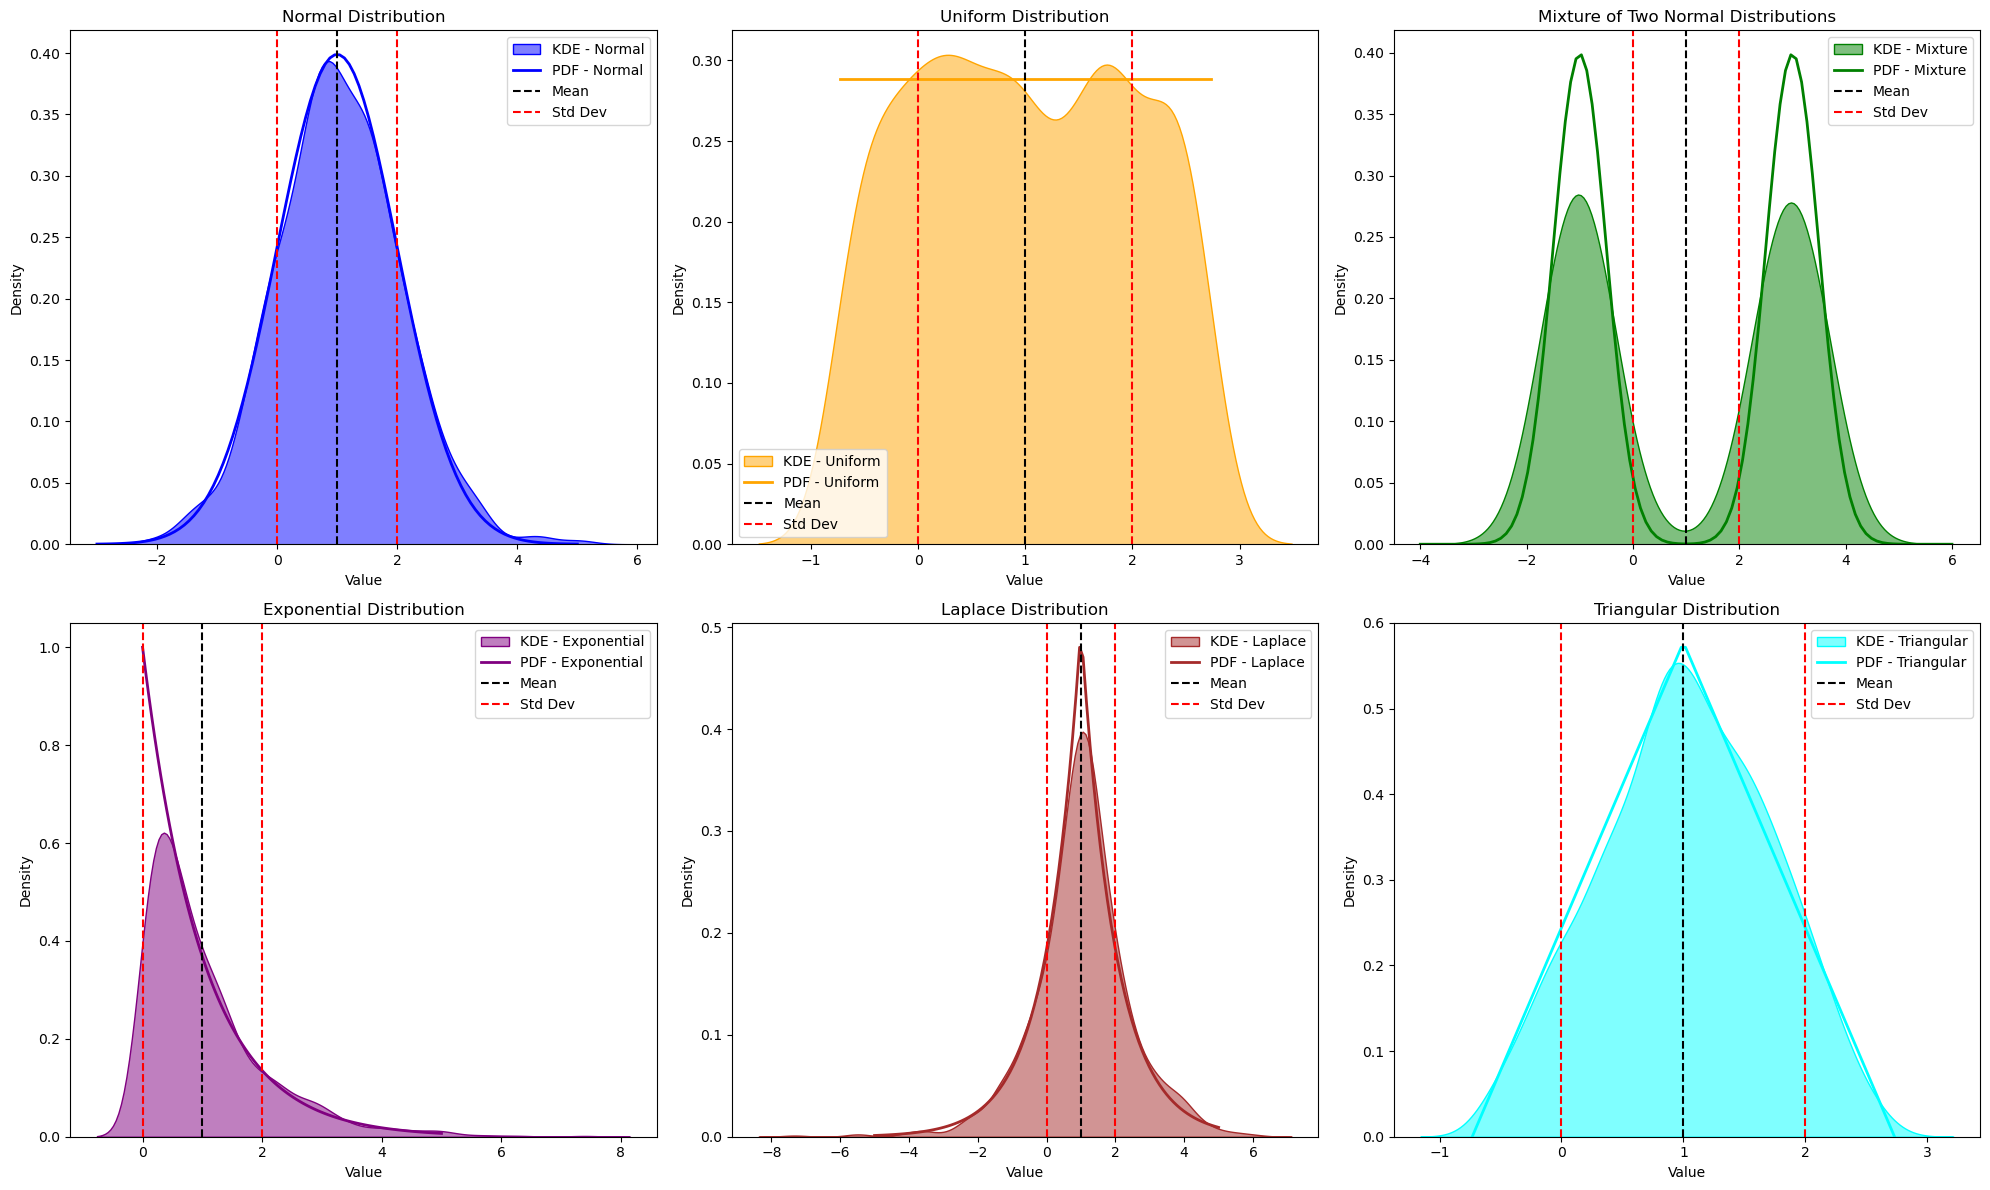

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, uniform, expon, laplace, triang

# Set the random seed for reproducibility
torch.manual_seed(0)

# Define parameters for all distributions
mean = 1    # Changed to a positive value
std_dev = 1
num_samples = 1000

# Generate data for Normal Distribution
normal_dist = torch.normal(mean, std_dev, size=(num_samples,))

# Generate data for Uniform Distribution
a = mean - std_dev * np.sqrt(3)  # Lower bound
b = mean + std_dev * np.sqrt(3)   # Upper bound
uniform_dist = torch.FloatTensor(num_samples).uniform_(a, b)

# Generate data for Mixture of Two Normal Distributions
mixture_dist = torch.cat([
    torch.normal(-1, 0.5, size=(num_samples // 2,)),  # First normal distribution centered at -1
    torch.normal(3, 0.5, size=(num_samples // 2,))    # Second normal distribution centered at 3
])

# Generate data for Exponential Distribution
lambda_param = 1 / mean  # Ensure mean matches
exponential_dist = torch.empty(num_samples).exponential_(lambda_param)

# Generate data for Laplace Distribution
laplace_dist = mean + std_dev * torch.sign(torch.randn(num_samples)) * torch.log(torch.rand(num_samples))

# Generate data for Triangular Distribution
c = 0.5  # Mode (middle of the triangle)
triangular_dist = torch.tensor(triang.rvs(c, loc=a, scale=(b-a), size=num_samples))

# Set up the plot
plt.figure(figsize=(20, 12))

# Plot Normal Distribution
plt.subplot(2, 3, 1)
sns.kdeplot(normal_dist.numpy(), fill=True, color='blue', alpha=0.5, label='KDE - Normal')
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
plt.plot(x, norm.pdf(x, mean, std_dev), 'b-', label='PDF - Normal', linewidth=2)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.axvline(mean, color='black', linestyle='--', label='Mean')
plt.axvline(mean + std_dev, color='red', linestyle='--', label='Std Dev')
plt.axvline(mean - std_dev, color='red', linestyle='--')
plt.legend()

# Plot Uniform Distribution
plt.subplot(2, 3, 2)
sns.kdeplot(uniform_dist.numpy(), fill=True, color='orange', alpha=0.5, label='KDE - Uniform')
plt.plot(np.linspace(a, b, 100), uniform.pdf(np.linspace(a, b, 100), a, b - a), 'orange', label='PDF - Uniform', linewidth=2)
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.axvline(mean, color='black', linestyle='--', label='Mean')
plt.axvline(mean + std_dev, color='red', linestyle='--', label='Std Dev')
plt.axvline(mean - std_dev, color='red', linestyle='--')
plt.legend()

# Plot Mixture of Two Normal Distributions
plt.subplot(2, 3, 3)
sns.kdeplot(mixture_dist.numpy(), fill=True, color='green', alpha=0.5, label='KDE - Mixture')
x_mixture = np.linspace(-4, 6, 100)
pdf_mixture = 0.5 * norm.pdf(x_mixture, -1, 0.5) + 0.5 * norm.pdf(x_mixture, 3, 0.5)
plt.plot(x_mixture, pdf_mixture, 'green', label='PDF - Mixture', linewidth=2)
plt.title('Mixture of Two Normal Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.axvline(mean, color='black', linestyle='--', label='Mean')
plt.axvline(mean + std_dev, color='red', linestyle='--', label='Std Dev')
plt.axvline(mean - std_dev, color='red', linestyle='--')
plt.legend()

# Plot Exponential Distribution
plt.subplot(2, 3, 4)
sns.kdeplot(exponential_dist.numpy(), fill=True, color='purple', alpha=0.5, label='KDE - Exponential')
x_exp = np.linspace(0, 5, 100)
plt.plot(x_exp, expon.pdf(x_exp, scale=mean), 'purple', label='PDF - Exponential', linewidth=2)
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.axvline(mean, color='black', linestyle='--', label='Mean')
plt.axvline(mean + std_dev, color='red', linestyle='--', label='Std Dev')
plt.axvline(mean - std_dev, color='red', linestyle='--')
plt.legend()

# Plot Laplace Distribution
plt.subplot(2, 3, 5)
sns.kdeplot(laplace_dist.numpy(), fill=True, color='brown', alpha=0.5, label='KDE - Laplace')
x_laplace = np.linspace(-5, 5, 100)
plt.plot(x_laplace, laplace.pdf(x_laplace, loc=mean, scale=std_dev), 'brown', label='PDF - Laplace', linewidth=2)
plt.title('Laplace Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.axvline(mean, color='black', linestyle='--', label='Mean')
plt.axvline(mean + std_dev, color='red', linestyle='--', label='Std Dev')
plt.axvline(mean - std_dev, color='red', linestyle='--')
plt.legend()

# Plot Triangular Distribution
plt.subplot(2, 3, 6)
sns.kdeplot(triangular_dist.numpy(), fill=True, color='cyan', alpha=0.5, label='KDE - Triangular')
x_triangular = np.linspace(a, b, 100)
plt.plot(x_triangular, triang.pdf(x_triangular, c, loc=a, scale=(b-a)), 'cyan', label='PDF - Triangular', linewidth=2)
plt.title('Triangular Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.axvline(mean, color='black', linestyle='--', label='Mean')
plt.axvline(mean + std_dev, color='red', linestyle='--', label='Std Dev')
plt.axvline(mean - std_dev, color='red', linestyle='--')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


# Cross-Entropy Derivation

The expression for the **cross-entropy** between two probability distributions \( P(x) \) and \( Q(x) \) arises from the concept of quantifying how well the distribution \( Q \) represents the true distribution \( P \). Let's break down the derivation of the cross-entropy formula \( H(P, Q) \) step by step.

## Cross-Entropy Definition

Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events. It quantifies how much information is needed to encode events from one distribution when using the encoding optimized for another distribution.

For two continuous probability distributions \( P(x) \) (the true distribution) and \( Q(x) \) (the approximating distribution), the cross-entropy \( H(P, Q) \) is defined as follows:

$$
H(P, Q) = -\int_{-\infty}^{\infty} P(x) \log Q(x) \, dx
$$

## Understanding the Components of the Formula

1. **Expectation**: The cross-entropy measures the expected value of the negative logarithm of \( Q(x) \) with respect to the distribution \( P(x) \). It tells us how well the distribution \( Q \) approximates the true distribution \( P \).

2. **Logarithm**: The logarithm of \( Q(x) \) appears because it is a common practice in information theory to measure information in terms of log probabilities. The logarithm provides a way to convert probabilities into a scale that can better reflect the notion of information content.

3. **Negative Sign**: The negative sign ensures that the cross-entropy value is non-negative. Since \( P(x) \) is a probability density function, \( P(x) \) is always non-negative, and \( \log Q(x) \) is non-positive (as long as \( Q(x) \) is between 0 and 1). Thus, the negative sign flips the overall value.

## Derivation and Intuition Behind Cross-Entropy

1. **Basic Concept**: 
   The goal is to evaluate how much information is required to describe samples from the distribution \( P \) when using a coding scheme based on \( Q \).

2. **Expected Information**: 
   For each sample \( x \) from \( P \), the information content (or surprise) associated with an event occurring with probability \( Q(x) \) is given by \( -\log Q(x) \). Therefore, if we sample from \( P \), the expected information for encoding using \( Q \) becomes:

   $$
   \text{Expected Information} = \int_{-\infty}^{\infty} P(x) (-\log Q(x)) \, dx
   $$

3. **Rearranging the Expression**: 
   The above expression can be rewritten as:

   $$
   H(P, Q) = -\int_{-\infty}^{\infty} P(x) \log Q(x) \, dx
   $$

## Summary

- The cross-entropy \( H(P, Q) \) provides a way to measure how one probability distribution \( Q \) approximates another distribution \( P \).
- It quantifies the expected number of bits (or information units) needed to encode information from \( P \) using the model \( Q \).
- The formula arises naturally when considering the expected negative logarithm of probabilities from the approximating distribution \( Q \), weighted by the true distribution \( P \).

This understanding leads us to the definition of cross-entropy in the form:

$$
H(P, Q) = -\int_{-\infty}^{\infty} P(x) \log Q(x) \, dx
$$

# Derivation of KL Divergence Formula

KL divergence quantifies the difference between two probability distributions \( P(x) \) and \( Q(x) \). The formula for KL divergence is given by:

$$
D_{\text{KL}}(P || Q) = \int_{-\infty}^{\infty} P(x) \log \left( \frac{P(x)}{Q(x)} \right) \, dx
$$

---

## Step 1: Definition of Entropy and Cross-Entropy

1. **Entropy of \( P \)**:
   The **entropy** \( H(P) \) of a probability distribution \( P(x) \) is defined as:

   $$
   H(P) = -\int_{-\infty}^{\infty} P(x) \log P(x) \, dx
   $$

   This expression captures the expected value of the logarithm of the probabilities.

2. **Cross-Entropy between \( P \) and \( Q \)**:
   The **cross-entropy** \( H(P, Q) \) measures how well the distribution \( Q \) represents the true distribution \( P \):

   $$
   H(P, Q) = -\int_{-\infty}^{\infty} P(x) \log Q(x) \, dx
   $$

   This expression quantifies the expected value of the logarithm of the probabilities under the distribution \( Q \).

---

## Step 2: KL Divergence as a Difference of Entropies

KL divergence \( D_{\text{KL}}(P || Q) \) can be expressed as the difference between cross-entropy and entropy:

$$
D_{\text{KL}}(P || Q) = H(P, Q) - H(P)
$$

This relationship indicates that KL divergence measures how much more "surprised" we are by the distribution \( Q \) when we assume the true distribution is \( P \).

---

## Step 3: Substituting Definitions

Now we substitute the definitions of entropy and cross-entropy into the expression for KL divergence:

$$
D_{\text{KL}}(P || Q) = \left( -\int_{-\infty}^{\infty} P(x) \log Q(x) \, dx \right) - \left( -\int_{-\infty}^{\infty} P(x) \log P(x) \, dx \right)
$$

When we simplify this, we get:

$$
D_{\text{KL}}(P || Q) = -\int_{-\infty}^{\infty} P(x) \log Q(x) \, dx + \int_{-\infty}^{\infty} P(x) \log P(x) \, dx
$$

---

## Step 4: Rearranging the Terms

The equation can be rearranged as follows:

$$
D_{\text{KL}}(P || Q) = \int_{-\infty}^{\infty} P(x) \log P(x) \, dx - \int_{-\infty}^{\infty} P(x) \log Q(x) \, dx
$$

Using the logarithmic property \( \log(a) - \log(b) = \log\left(\frac{a}{b}\right) \), we can combine these two integrals:

$$
D_{\text{KL}}(P || Q) = \int_{-\infty}^{\infty} P(x) \left( \log P(x) - \log Q(x) \right) \, dx
$$

This can be simplified to:

$$
D_{\text{KL}}(P || Q) = \int_{-\infty}^{\infty} P(x) \log \left( \frac{P(x)}{Q(x)} \right) \, dx
$$

---

## Final KL Divergence Formula

Thus, the formula for KL divergence is:

$$
D_{\text{KL}}(P || Q) = \int_{-\infty}^{\infty} P(x) \log \left( \frac{P(x)}{Q(x)} \right) \, dx
$$

---

## Summary of the Derivation

1. **Entropy** captures the uncertainty of a distribution.
2. **Cross-entropy** measures the expected value of a distribution based on another distribution.
3. **KL divergence** quantifies the difference between two distributions by comparing their cross-entropy and entropy.

### Why Use KL Divergence Instead of Cross-Entropy Directly

Using KL divergence instead of cross-entropy directly has important implications in various contexts, particularly in machine learning and information theory. Here are some reasons why KL divergence is often preferred:

---

#### 1. Interpretability
- **KL Divergence**: KL divergence provides a measure of how one probability distribution diverges from a second, expected probability distribution. Specifically, it quantifies the additional entropy (or surprise) introduced when using distribution \(Q\) instead of \(P\). This interpretability is useful for understanding the efficiency of different probabilistic models.
  
- **Cross-Entropy**: While cross-entropy gives a measure of the total entropy from the true distribution \(P\) and the model \(Q\), it does not directly convey how much the model \(Q\) is misrepresenting the true distribution.

---

#### 2. Connection to Likelihood
- KL divergence can be seen as a measure of the inefficiency of assuming that the distribution is \(Q\) when the true distribution is \(P\). In other words, it indicates how much "extra information" is needed when using \(Q\) instead of \(P\).
- This makes KL divergence particularly useful in optimization problems, such as training generative models (e.g., variational autoencoders), where minimizing KL divergence directly reflects improving the model’s approximation of the true data distribution.

---

#### 3. Non-negativity
- KL divergence is always non-negative. It satisfies the property \(D_{\text{KL}}(P || Q) \geq 0\) with equality if and only if \(P = Q\) almost everywhere. This property makes KL divergence a suitable measure for assessing the divergence of distributions, as it aligns with the intuitive notion that divergence cannot be negative.
  
- On the other hand, cross-entropy can take on various values depending on the specific probabilities and does not have a natural interpretation in terms of divergence.

---

#### 4. Flexibility in Optimization
- KL divergence is often used in various machine learning algorithms, particularly in situations involving optimization problems. For instance, in training deep learning models, minimizing KL divergence can lead to more stable training and better generalization to unseen data.
  
- Cross-entropy loss is often minimized during classification tasks, but it can be viewed as a form of KL divergence when considering the relationship between predicted and actual distributions.

---

In summary, while both cross-entropy and KL divergence are useful in measuring the discrepancy between distributions, KL divergence provides a more interpretable, efficient, and mathematically convenient framework for evaluating and optimizing probabilistic models.
